In [8]:
# Python 3.5.4 |Continuum Analytics, Inc.|
# Jupyter Notebook 5.0.0

# SAMPLE CODE FOR TEMPLATE MATCHING
# BASED ON OpenCV Tutorials

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [9]:
# READ IN THE IMAGES
# CONVERT SOURCE TO GRAYSCALE
img_rgb = cv2.imread('Images/20170815Close.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('Images/ChickenPatch.jpg',0)
w, h = template.shape[::-1]



In [10]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.99  # SETTING HIGH THRESHOLD WILL RETURN PRIMARY
loc = np.where( res >= threshold)

In [11]:
f = set()

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

    sensitivity = 100
    f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

cv2.imwrite('Images/Found1.png',img_rgb)

found_count = len(f)
print(found_count)

1


In [12]:
# ALTERNATE APPROACH WITH LOWER THRESHOLD
# SETTING LOWER THRESHOLD WILL RETURN MULTIPLE
# NOT GOOD FOR COUNTING UNLESS EACH MATCH IS EXACT TO PATCH

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.55  
loc = np.where( res >= threshold)

f = set()

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

    sensitivity = 100
    f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

cv2.imwrite('Images/FoundMany.png',img_rgb)

found_count = len(f)
print(found_count)

13


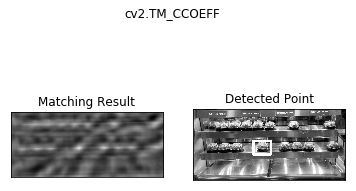

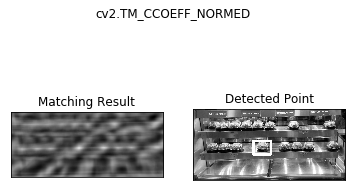

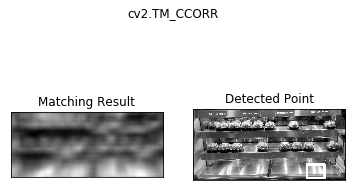

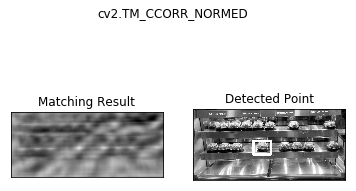

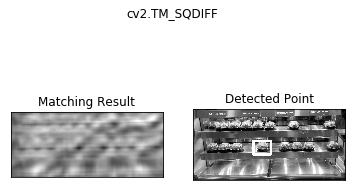

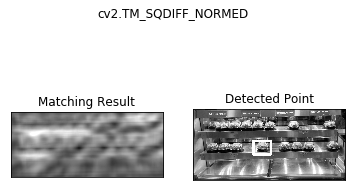

In [13]:
# VARIATION BASED ON OpenCV TUTORIALS

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# RELOAD NEW IMAGES

img_rgb = cv2.imread('Images/20170815Close.jpg',0)
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('Images/ChickenPatch.jpg',0)
w, h = template.shape[::-1]

for meth in methods:
    img = img_rgb.copy()    
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, (255,255,0), 32)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [4]:
# System Information
import platform
import pandas as pd
print('Python is ' + platform.python_version())

pd.show_versions(as_json=False)

Python is 3.5.4

INSTALLED VERSIONS
------------------
commit: None
python: 3.5.4.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.20.3
pytest: None
pip: 9.0.1
setuptools: 36.4.0
Cython: None
numpy: 1.13.1
scipy: 0.19.1
xarray: None
IPython: 6.1.0
sphinx: None
patsy: 0.4.1
dateutil: 2.6.1
pytz: 2017.2
blosc: None
bottleneck: None
tables: None
numexpr: None
feather: None
matplotlib: 2.0.2
openpyxl: None
xlrd: None
xlwt: None
xlsxwriter: None
lxml: None
bs4: None
html5lib: 0.9999999
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 2.9.6
s3fs: None
pandas_gbq: None
pandas_datareader: None
